<a href="https://colab.research.google.com/github/bgalerne/IoT_data_science/blob/main/1_iot_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to image processing

First let us discuss python libraries



In [19]:
import numpy as np
import matplotlib.pyplot as plt

import skimage
import imageio


Downlaod some image files:

In [20]:
!wget "https://www.idpoisson.fr/galerne/iot_data_science/parrot.bmp"

--2020-12-14 22:26:19--  https://www.idpoisson.fr/galerne/iot_data_science/parrot.bmp
Resolving www.idpoisson.fr (www.idpoisson.fr)... 134.206.83.41
Connecting to www.idpoisson.fr (www.idpoisson.fr)|134.206.83.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736614 (719K) [image/x-ms-bmp]
Saving to: ‘parrot.bmp.1’

parrot.bmp.1        100%[===================>] 719.35K  1.31MB/s    in 0.5s    

2020-12-14 22:26:20 (1.31 MB/s) - ‘parrot.bmp.1’ saved [736614/736614]



In [24]:
u = imageio.imread('parrot.bmp')
print(u.shape)
print(u.dtype)
# u is an RGB  image (3 chanels), each having size 495 x 495.
# store this values (to adapt to other images)
M, N, nc = u.shape
# M is the height, N is the width (matrix convention)


None
(495, 495, 3)
uint8


##Image visualization:

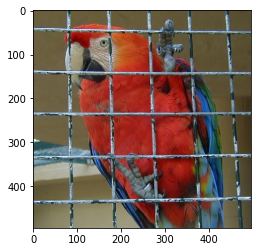

In [17]:
plt.imshow(u);

## Type of data: int8 VS float
uint8 type = integers between 0 and 255. 
This is the 8-bits representation for pixel gray-level, but it is not possible to do computation with this:

In [29]:
x = np.array([250,30]).astype('uint8')
print(x)
print(x.dtype)
s = x[0]+x[1]
d = x[1]-x[0]
m1 = (x[0]+x[1])/2
m2 = x[0]/2 + x[1]/2
print(s, d, m1, m2)

[250  30]
uint8
24 36 12.0 140.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


Conclusion: **No processing with uint8 type**

Always convert do float or double precision before any operation. 
Only use uint8 before writing image file on disk.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(495, 495, 3)
uint8


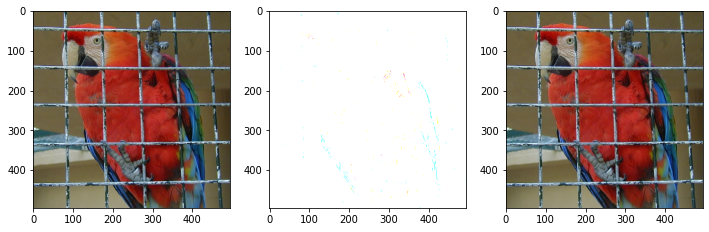

In [35]:
u = imageio.imread('parrot.bmp')
print(u.shape)
print(u.dtype)

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
axes[0].imshow(u)
axes[1].imshow(u.astype('float64'))
axes[2].imshow(u.astype('float64')/255)


**Warning:**

*   For RGB images with double precision imshow assumes the convention of RGB colors in the cube $[0,1]^3$
*   For RGB images in uint8 imshow assumes colors in the cube $[0,255]^3$

The proper conversion is done by the function ```skimage.img_as_float```


float64
0.0 1.0


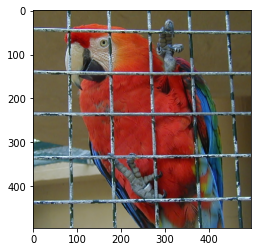

In [38]:
u = skimage.img_as_float(imageio.imread('parrot.bmp'))
print(u.dtype)
print(np.min(u),np.max(u))
plt.imshow(u);

##RGB chanels:


(495, 495)


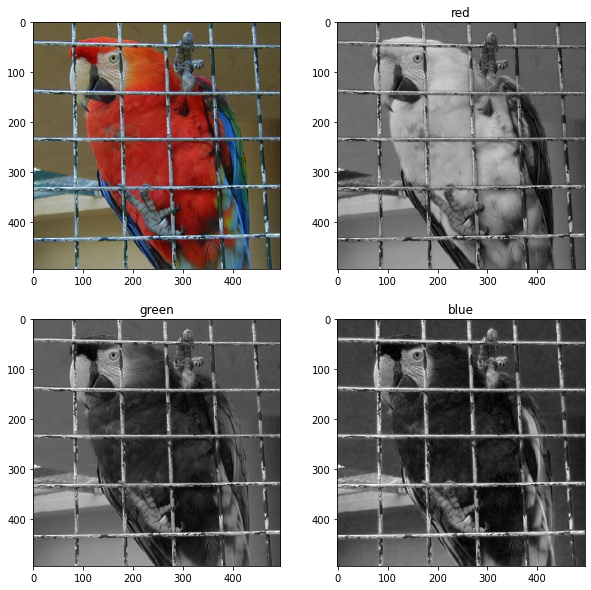

In [49]:
u = skimage.img_as_float(imageio.imread('parrot.bmp'))
r = u[:,:,0]
print(r.shape)
g = u[:,:,1]
b = u[:,:,2]

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(u) 
ax[1].imshow(r, cmap=plt.cm.gray)
ax[1].set_title('red')
ax[2].imshow(g, cmap=plt.cm.gray)
ax[2].set_title('green')
ax[3].imshow(b, cmap=plt.cm.gray)
ax[3].set_title('blue');



###Exercise: 

Create the 3 RGB images rRGB, gRGB, bRGB that have the original r, g, b channels of u and the 2 other channels equal to zero.

Plot the 4 (u, rRGB, gRGB, bRGB) images as above.




In [ ]:
# TODO

##Convert an RGB image to a gray-level image

The value of each grayscale pixel is calculated as the weighted sum of the corresponding red, green and blue pixels as:

Y = 0.2125 R + 0.7154 G + 0.0721 B

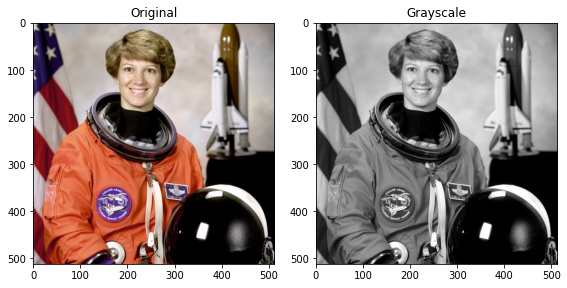

In [11]:

original = skimage.data.astronaut()
grayscale = skimage.color.rgb2gray(original)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()



###Exercise:


1.   Do the same conversion with the parrot image.
2.   Compute the grayscale verison by a direct computation of Y = 0.2125 R + 0.7154 G + 0.0721 B and check that the two results are the same.



In [ ]:
#TODO

##Crop a subpart of the image

One can extract subpart of images using matrix extraction.

###Exercise:


1.   Extract a subimage that represent the head of the astronaut.
2.   Insert the head in color version within the image in grayscale verison.
3. (More challenging, can be skipped) Same insertion but following a round region arround the head. Hint: Create the image of a disk and use Boolean selection.


In [ ]:
#TODO